In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # 범례 깨지는 현상 완화

df = pd.read_csv('data/raw/BankChurners.csv')

df.columns = df.columns.str.strip()  # 컬럼 공백 제거
print("Data Shape:", df.shape)

Data Shape: (10127, 23)


**식별자 및 타겟 변수 (Identifiers & Target)**

- CLIENTNUM | 고객 식별 번호 | (Customer ID) | 전처리 시 제거 대상
- Attrition_Flag | 고객 이탈 여부 | (Existing Customer, Attrited Customer) | 타겟 변수 (Y)

In [9]:
df['Attrition_Flag'].value_counts(normalize=True) 

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

### 식별자 및 타겟 변수 (Identifiers & Target)
- 0   CLIENTNUM : 고객 번호
- 1   Attrition_Flag : 고객 이탈 여부. Existing Customer 유지 0, Attrited Customer 서비스 해지 고객 1

### 인구 통계 및 카드 정보 (Demographics & Card Info)
- 2   Customer_Age : 고객 나이
- 3   Gender : 성별 (M, F)
- 4   Dependent_count : 부양 가족 수
- 5   Education_Level : 고객 최종 학력
- 6   Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
- 7   Income_Category : 고객의 연간 소득 구간 (Less than $40K, $40-$60K 등)
- 8   Card_Category : 보유한 카드 등급 

### 계좌 및 관계 기간 정보 (Account & Relationship Tenure)
- 9   Months_on_book : 고객과 은행이 관계 맺어온 기간 (월 단위)
- 10  Total_Relationship_Count : 고객이 보유한 상품 (카드, 대출 등)의 총 개수
- 11  Months_Inactive_12_mon : 지난 12개월 동안 활동 없었던 월의 수
- 12  Contacts_Count_12_mon : 지난 12개월 동안 고객에게 연락을 시도한 횟수

### 재무 및 거래 활동 정보 (Financial & Transaction Activity)
- 13  Credit_Limit : 신용카드의 총 신용한도
- 14  Total_Revolving_Bal : 리볼빙 (회전 신용)으로 남아있는 잔액 총액
- 15  Avg_Open_To_Buy : 사용 가능한 평균 신용 한도 (Credit_Limit - Total_Revolving_Bal)
- **16  Total_Amt_Chng_Q4_Q1 : 4분기 (Q4) 대비 1분기 (Q1)의 거래 금액 변화율**
- 17  Total_Trans_Amt : 지난 12개월 동안의 총 거래 금액
- 18  Total_Trans_Ct : 지난 12개월 동안의 총 거래 횟수 (건수)
- **19  Total_Ct_Chng_Q4_Q1 : 4분기 (Q4) 대비 1분기 (Q1)의 거래 횟수 변화율**
- **20  Avg_Utilization_Ratio : 평균 카드 사용율 (Total_Revolving/Credit_Limit)**

### 데이터 유출 위험 컬럼 (Data Leakage Risk)
- 21  Naive_Bayes_Classifier_...1 : 나이브 베이즈로 계산된 예측 확률 값. 전처리 시 제거 대상
- 22  Naive_Bayes_Classifier_...1 : 나이브 베이즈로 계산된 예측 확률 값. 전처리 시 제거 대상

In [10]:
cols_to_drop = [
    'CLIENTNUM', 
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df = df.drop(columns=cols_to_drop)

print("컬럼 제거 후 Shape:", df.shape)

컬럼 제거 후 Shape: (10127, 20)


In [11]:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

--- 2.1. 이탈률 분석 ---
Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

이탈 고객 비율 (1): 16.07%
기존 고객 비율 (0): 83.93%


/var/folders/c1/rj7tb8cj0031l588c7fyvw0w0000gn/T/ipykernel_31971/3391570905.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_ratio.index, y=churn_ratio.values, palette='viridis')


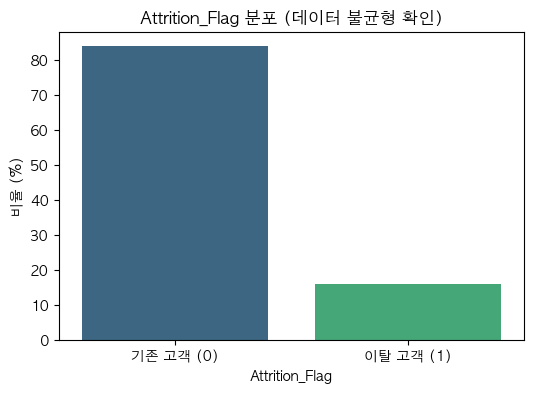

--- 2.2. 결측치 및 'Unknown' 분석 ---
Null 값 합계:
 Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
'Education_Level'의 'Unknown' 개수: 1519개 (15.00%)
'Marital_Status'의 'Unknown' 개수: 749개 (7.40%)
'Income_Category'의 'Unknown' 개수: 1112개 (10.98%)


In [ ]:
print("--- 2.1. 이탈률 분석 ---")
churn_counts = df['Attrition_Flag'].value_counts()
churn_ratio = df['Attrition_Flag'].value_counts(normalize=True).mul(100).round(2)

print(churn_counts)
print(f"\n이탈 고객 비율 (1): {churn_ratio[1]}%")
print(f"기존 고객 비율 (0): {churn_ratio[0]}%")

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_ratio.index, y=churn_ratio.values, palette='viridis')
plt.xticks([0, 1], ['기존 고객 (0)', '이탈 고객 (1)'])
plt.title('Attrition_Flag 분포 (데이터 불균형 확인)')
plt.ylabel('비율 (%)')
plt.show() 

print("--- 2.2. 결측치 및 'Unknown' 분석 ---")
print("Null 값 합계:\n", df.isnull().sum())

categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in categorical_cols:
    unknown_count = (df[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"'{col}'의 'Unknown' 개수: {unknown_count}개 ({unknown_count / len(df) * 100:.2f}%)")


--- 3단계: 범주형 Feature와 이탈의 관계 ---


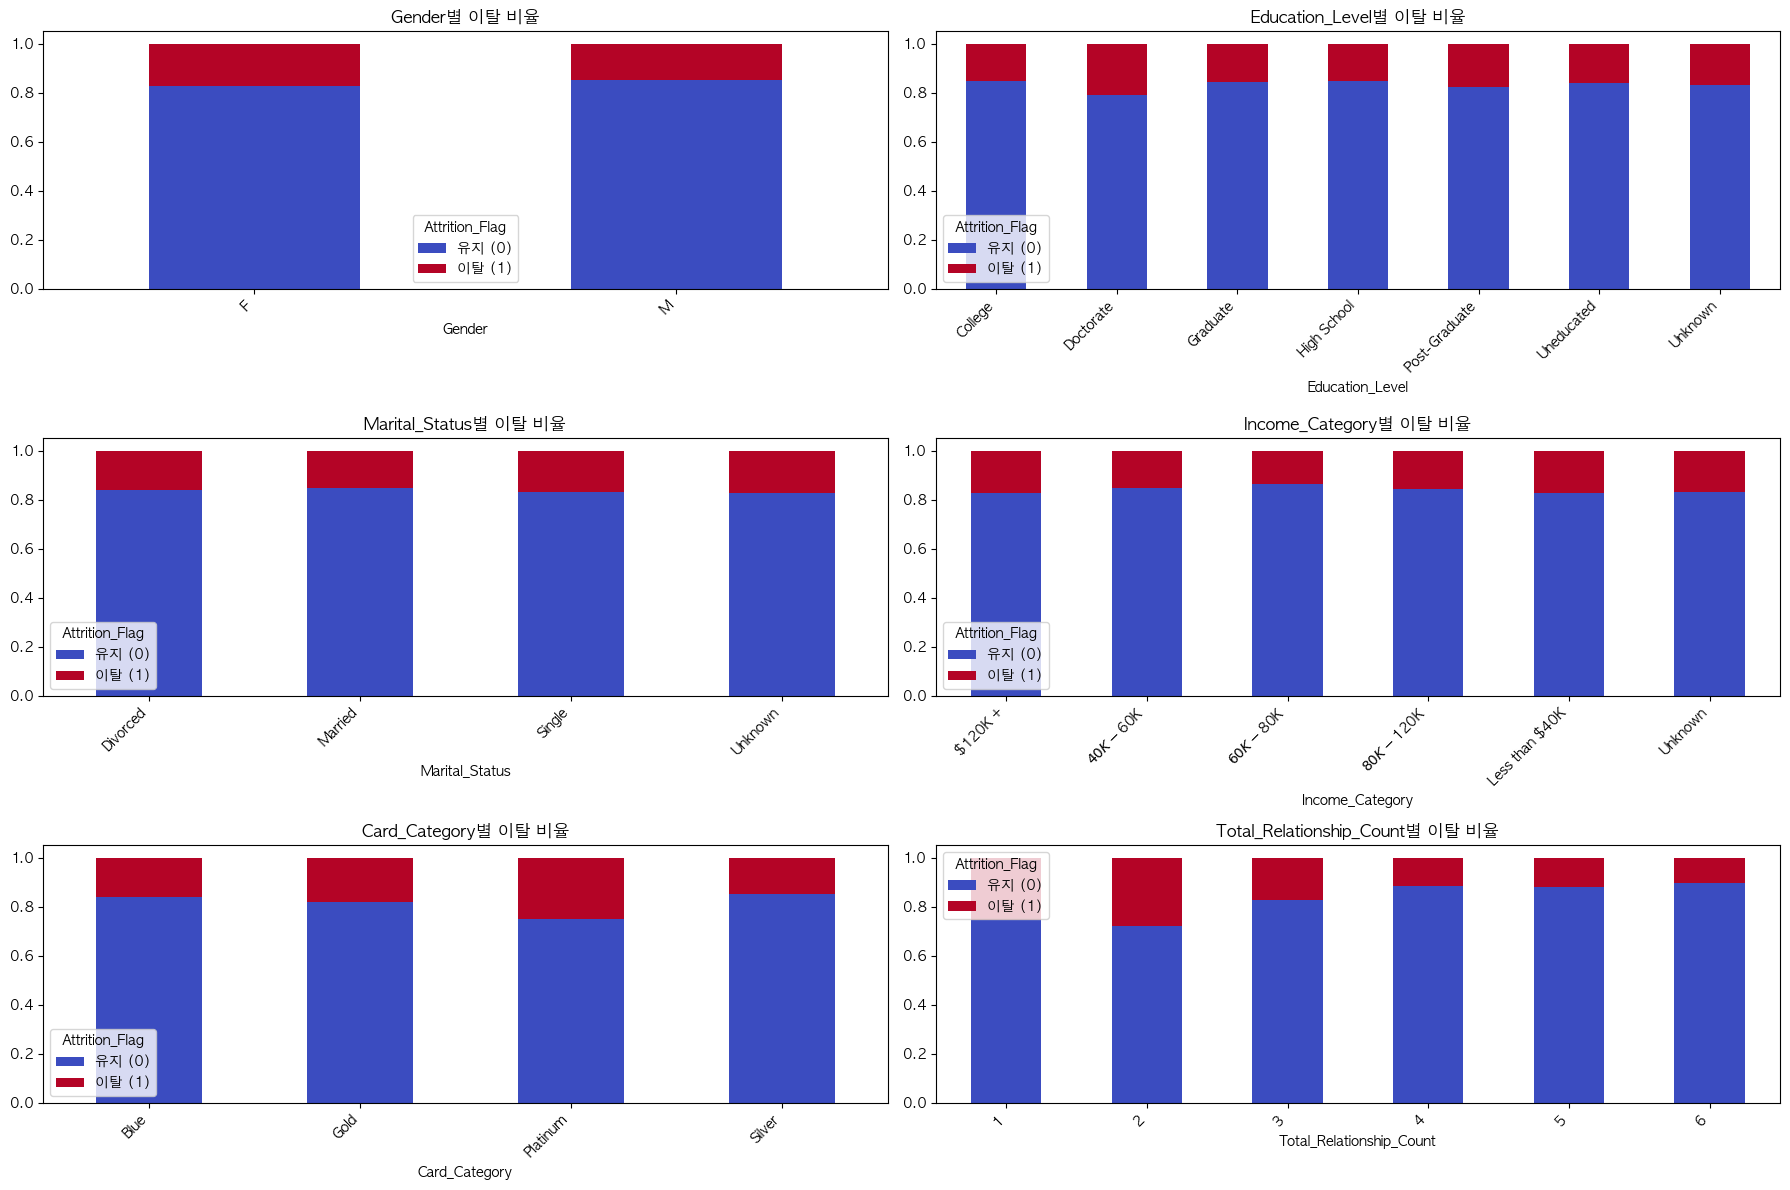

In [ ]:
print("\n--- 3단계: 범주형 Feature와 이탈의 관계 ---")
categorical_cols_for_analysis = [
    'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count'
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols_for_analysis):
    plt.subplot(3, 2, i + 1)
        
    data_pct = pd.crosstab(df[col], df['Attrition_Flag'], normalize='index')
    
    data_pct.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='coolwarm')
    plt.title(f'{col}별 이탈 비율')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Attrition_Flag', labels=['유지 (0)', '이탈 (1)'])

plt.tight_layout()
plt.show()

Total_Relationship_Count가 낮은 고객의 이탈률 높다 (보유 상품이 적을수록 이탈 위험 증가).

--- 4.1. 수치형 Feature 기본 통계 ---
                          count         mean          std     min       25%  \
Customer_Age            10127.0    46.325960     8.016814    26.0    41.000   
Credit_Limit            10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Trans_Amt         10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct          10127.0    64.858695    23.472570    10.0    45.000   
Months_on_book          10127.0    35.928409     7.986416    13.0    31.000   
Months_Inactive_12_mon  10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon   10127.0     2.455317     1.106225     0.0     2.000   
Avg_Utilization_Ratio   10127.0     0.274894     0.275691     0.0     0.023   

                             50%        75%        max  
Customer_Age              46.000     52.000     73.000  
Credit_Limit            4549.000  11067.500  34516.000  
Total_Trans_Amt         3899.000   4741.000  18484.000  
Total_Trans_Ct            67.

/var/folders/c1/rj7tb8cj0031l588c7fyvw0w0000gn/T/ipykernel_31971/24861294.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y=col, data=df, palette='Pastel1')
/var/folders/c1/rj7tb8cj0031l588c7fyvw0w0000gn/T/ipykernel_31971/24861294.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y=col, data=df, palette='Pastel1')
/var/folders/c1/rj7tb8cj0031l588c7fyvw0w0000gn/T/ipykernel_31971/24861294.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y=col, data=df, palette='Pastel1')
/

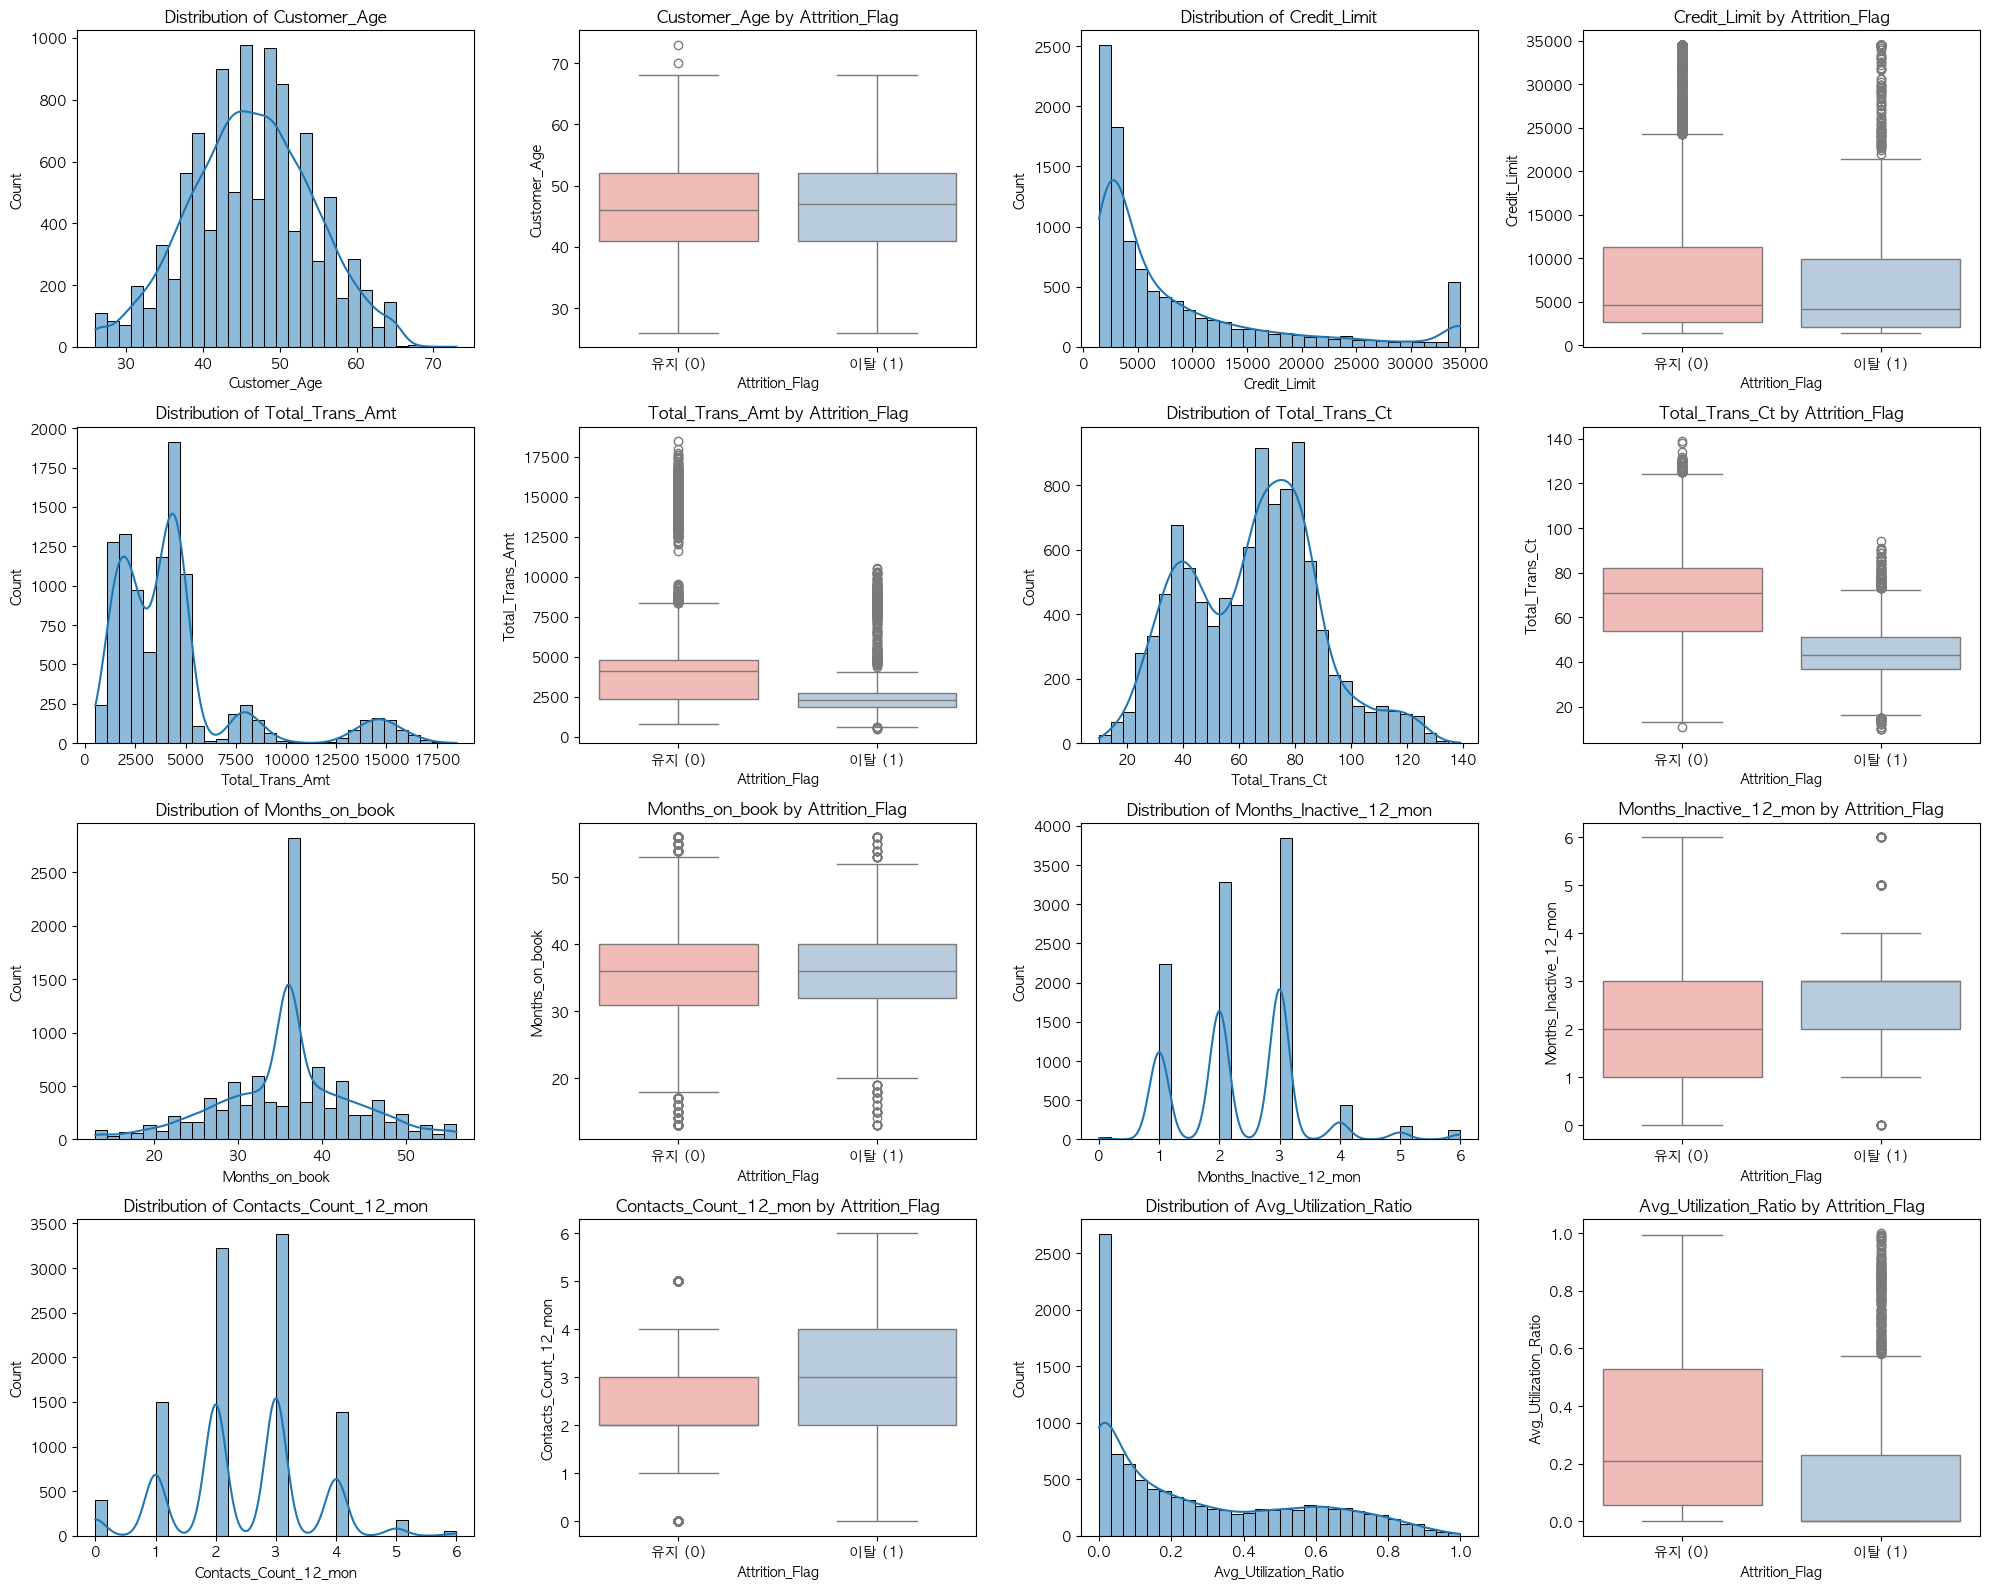

In [ ]:
numerical_cols = [
    'Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 
    'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
    'Avg_Utilization_Ratio'
]
print("--- 4.1. 수치형 Feature 기본 통계 ---")
print(df[numerical_cols].describe().T)

plt.figure(figsize=(20, 16))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(4, 4, 2*i + 2)
    sns.boxplot(x='Attrition_Flag', y=col, data=df, palette='Pastel1')
    plt.xticks([0, 1], ['유지 (0)', '이탈 (1)'])
    plt.title(f'{col} by Attrition_Flag')

plt.tight_layout()
plt.show()

이상치: 박스 플롯에서 이탈/유지 그룹 모두에서 이상치가 있는지 확인하고, 있다면 Feature Engineering 또는 전처리 파트에서 처리 방안 논의.

주요 변수 비교: Total_Trans_Amt (총 거래 금액) / Total_Trans_Ct (총 거래 횟수): 이탈 고객과 기존 고객의 분포가 크게 차이 나는지 확인. 